In [60]:
import pydis
from pydis import flatcombine

In [61]:
#Import Functions

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage import exposure
import astropy.visualization
from astropy.visualization import LinearStretch, ZScaleInterval
from astropy.io import fits
import numpy as np
import sys, getopt
import os
import glob
import zipfile

In [62]:
os.getcwd()
os.chdir('/Users/saraholeman/biasfolder')
os.getcwd()

#extract files from zip for bias frames[59-159]
with zipfile.ZipFile("biasframes.zip","r") as zip_ref: #read files 'r'
    zip_ref.extractall("biasframes") #folder name 'biasframes'
#change current working directory to biasframes folder 
os.chdir('/Users/saraholeman/biasfolder/biasframes')
#os.getcwd()

In [64]:
#identify current working directory path
path = os.getcwd()
#create list for bias fits files 
bias_list = glob.glob(path + '/*.fits')
#len(bias_list)

101

In [65]:
#bias_list
bias_data = []
for bias in bias_list: 
    read_file_header = fits.open(bias)
    bias_file_data = read_file_header[0].data
    bias_data.append(bias_file_data)
    #print( bias_file_data.shape)

Text(0.5, 1.0, 'masterbias_median_scaled')

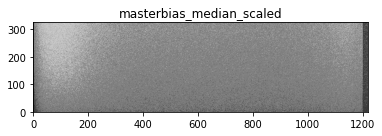

In [66]:
biasstack = np.stack(bias_data, axis = 0)
#print(biasstack.shape)
masterbias_median = np.median(biasstack, axis = 0)
linear_zscaling = LinearStretch() + ZScaleInterval()
masterbias_median_scaled = linear_zscaling(masterbias_median) 
plt.imshow(masterbias_median_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterbias_median_scaled")
#fits.writeto('masterbias_median_scaled.fits', masterbias_median_scaled)

Text(0.5, 1.0, 'masterbias_mean_scaled')

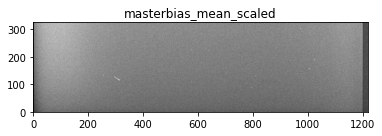

In [67]:
masterbias_mean = np.mean(biasstack, axis = 0)
#apply linear/zscaling 
linear_zscaling = LinearStretch() + ZScaleInterval()
masterbias_mean_scaled = linear_zscaling(masterbias_mean) 
plt.imshow(masterbias_mean_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterbias_mean_scaled")

Text(0.5, 1.0, 'masterbias_mean_scaled')

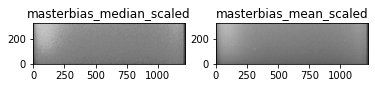

In [68]:
#show both masterbias_median_scaled & masterbias_mean_scaled

rows, cols = 1, 2
plt.subplot(rows, cols, 1)
plt.imshow(masterbias_median_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterbias_median_scaled")

plt.subplot(rows, cols, 2)
plt.imshow(masterbias_mean_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterbias_mean_scaled")


In [58]:
#master flat

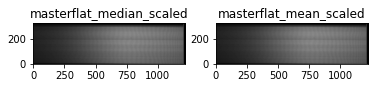

In [46]:
#identify current working directory 
os.getcwd()
#change current working directory to flatfolder 
os.chdir('/Users/saraholeman/flatfolder')
#check changed current working directory 
os.getcwd()

#extract files from zip for flat frames[1-18]
with zipfile.ZipFile("flatframes.zip","r") as zip_ref: #read files 'r'
    zip_ref.extractall("flatframes") #folder name 'flatframes'

#change current working directory to flatframes folder 
os.chdir('/Users/saraholeman/flatfolder/flatframes')
#check changed current working directory
os.getcwd()
#identify current working directory path
path = os.getcwd()
#create list for flat fits files 
flat_list = glob.glob(path + '/*.fits')
#flat_list #[check]

#loop through all files to get individual data to stack and take median or mean [?] for masterflat
flat_stack = []

for flat in flat_list: 
    read_file_header = fits.open(flat)
    flat_file_data = read_file_header[0].data
    flat_stack.append(flat_file_data)
    
    

#option #1 median combination 

flatstack = np.stack(flat_stack, axis = 0)
masterflat_median = np.median(flatstack, axis = 0)

#apply linear/zscaling 
linear_zscaling = LinearStretch() + ZScaleInterval()
masterflat_median_scaled = linear_zscaling(masterflat_median) 
#plt.imshow(masterflat_median_scaled, origin = 'lower', cmap = 'gray')
#plt.title("masterflat_median_scaled")
#fits.writeto('masterflat_median_scaled.fits', masterflat_median_scaled)

#option #2 average combination 

flatstack = np.stack(flat_stack, axis = 0)
masterflat_mean = np.mean(flatstack, axis = 0)

#apply linear/zscaling 
linear_zscaling = LinearStretch() + ZScaleInterval()
masterflat_mean_scaled = linear_zscaling(masterflat_mean) 
#plt.imshow(masterflat_mean_scaled, origin = 'lower', cmap = 'gray')
#plt.title("masterflat_mean_scaled")

#show both masterflat_median_scaled & masterflat_mean_scaled

rows, cols = 1, 2
plt.subplot(rows, cols, 1)
plt.imshow(masterflat_median_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterflat_median_scaled")

plt.subplot(rows, cols, 2)
plt.imshow(masterflat_mean_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterflat_mean_scaled")
plt.show()

In [82]:
flat_1 = flat_stack[0]
flat_1.shape
masterflat_median.shape

(326, 1220)

In [60]:
#master science

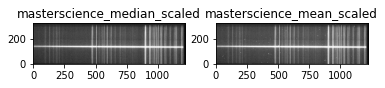

In [47]:
#identify current working directory 
os.getcwd()
#change current working directory to science folder 
os.chdir('/Users/saraholeman/sciencefolder')
#check changed current working directory 
os.getcwd()

#extract files from zip for science frames[20 - 23]
with zipfile.ZipFile("scienceframes.zip","r") as zip_ref: #read files 'r'
    zip_ref.extractall("scienceframes") #folder name 'scienceframes'

#change current working directory to scienceframes folder 
os.chdir('/Users/saraholeman/sciencefolder/scienceframes')
#check changed current working directory
os.getcwd()
#identify current working directory path
path = os.getcwd()
#create list for science fits files 
science_list = glob.glob(path + '/*.fits')
#science_list #[check]

#loop through all files to get individual data to stack and take median or mean [?] for masterflat
science_stack = []

for science in science_list: 
    read_file_header_science = fits.open(science)
    science_file_data = read_file_header_science[0].data
    science_stack.append(science_file_data)
    

#option #1 median combination 

sciencestack = np.stack(science_stack, axis = 0)
masterscience_median = np.median(sciencestack, axis = 0)

#apply linear/zscaling 
linear_zscaling = LinearStretch() + ZScaleInterval()
masterscience_median_scaled = linear_zscaling(masterscience_median) 
#plt.imshow(masterscience_median_scaled, origin = 'lower', cmap = 'gray')
#plt.title("masterscience_median_scaled")
#fits.writeto('masterscience_median_scaled.fits', masterscience_median_scaled)

#option #2 average combination 

sciencestack = np.stack(science_stack, axis = 0)
masterscience_mean = np.mean(sciencestack, axis = 0)

#apply linear/zscaling 
linear_zscaling = LinearStretch() + ZScaleInterval()
masterscience_mean_scaled = linear_zscaling(masterscience_mean) 
#plt.imshow(masterscience_mean_scaled, origin = 'lower', cmap = 'gray')
#plt.title("masterscience_mean_scaled")

#show both masterscience_median_scaled & masterscience_mean_scaled

rows, cols = 1, 2
plt.subplot(rows, cols, 1)
plt.imshow(masterscience_median_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterscience_median_scaled")

plt.subplot(rows, cols, 2)
plt.imshow(masterscience_mean_scaled, origin = 'lower', cmap = 'gray')
plt.title("masterscience_mean_scaled")
plt.show()

In [69]:
#working with pydis
#https://pydis.readthedocs.io/stepbystep.html#make-master-calibration-files ---- Reduction Guide

In [70]:
import pydis
from pydis import flatcombine, biascombine

In [96]:
os.getcwd()
os.chdir('/Users/saraholeman/biasfolder/biasframes')
path = os.getcwd()
#path
bias_list = glob.glob(path + '/*.fits')
print(len(bias_list))

101


In [98]:
biascombine = pydis.biascombine(bias_list,  output = 'BIAS2.fits', trim = False)
print(biascombine.shape)

#print(masterflat_median.shape)

(326, 1220)


In [104]:
os.getcwd()

'/Users/saraholeman/biasfolder/biasframes'

In [109]:
#change current working directory to flatframes folder 
os.chdir('/Users/saraholeman/flatfolder/flatframes')
#check changed current working directory
os.getcwd()
#identify current working directory path
path = os.getcwd()
path

'/Users/saraholeman/flatfolder/flatframes'

In [123]:
#change current working directory to flatframes folder 
os.chdir('/Users/saraholeman/flatfolder/flatframes')
#check changed current working directory
os.getcwd()
#identify current working directory path
path = os.getcwd()
#create list for flat fits files 
flat_list = glob.glob(path + '/*.fits')
#flat_list #[check]

#loop through all files to get individual data to stack and take median or mean [?] for masterflat
flat_stack = []

for flat in flat_list: 
    read_file_header = fits.open(flat)
    flat_file_data = read_file_header[0].data
    flat_stack.append(flat_file_data)
    print((type(flat_file_data)), flat_file_data.shape)

<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)
<class 'numpy.ndarray'> (326, 1220)


In [122]:
print(biascombine.shape)
print(type(biascombine))

(326, 1220)
<class 'numpy.ndarray'>


In [124]:
flat = pydis.flatcombine(flat_list, biascombine, trim=False, mode='spline', response=True, Saxis = 1)

Exception: array and kernel have differing number of dimensions.

In [74]:

os.chdir('/Users/saraholeman/flatfolder/flatframes')

os.getcwd()

'/Users/saraholeman/flatfolder/flatframes'

In [92]:
#identify current working directory path
path = os.getcwd()
#create list for flat fits files 
flat_list = glob.glob(path + '/*.fits')
flat_list


In [97]:
biascombine = pydis.biascombine(bias_list,  output = 'BIAS.fits', trim = True)
np.shape(biascombine)

(326, 1200)

In [105]:
#using function flat combine to generate the master flat, correct for the broad wavelength dependency and normalize. 
pydis.flatcombine(flat_list, biascombine, output = 'FLAT.fits', mode = 'spline', display = True, flat_poly = 5, response = True, Saxis = 1)

Exception: array and kernel have differing number of dimensions.

In [90]:
#shape of bias vs. flat list? 
x = np.shape(masterbias_mean_scaled)
x

(326, 1220)

In [91]:
x = np.shape(masterflat_median)
x

(326, 1220)

In [94]:
x = np.shape(flat_stacked)
x

(18,)